In [233]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
%cd /content/drive/MyDrive/CO543_Mini_Project/isuris plots

/content/drive/MyDrive/CO543_Mini_Project/isuris plots


In [235]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# image folder

#folder = "/content/drive/MyDrive/CO543_Mini_Project/images"
folder = "/content/drive/MyDrive/CO543_Mini_Project/Super resolution"

In [236]:
img1 = cv2.imread(folder+"/D1_super.jpg",0)


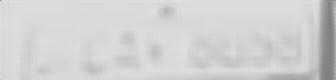

In [237]:
cv2_imshow(img1)

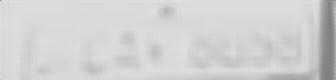

In [238]:
scale_percent = 100 # percent of original size
width = int(img1.shape[1] * scale_percent / 100)
height = int(img1.shape[0] * scale_percent / 100)
dim = (width, height)
  
resized = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized )

In [239]:
from imutils import paths

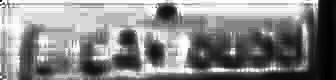

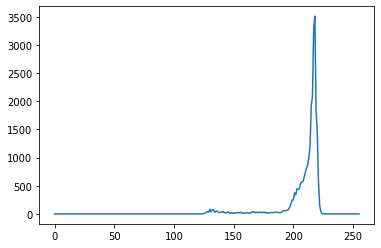

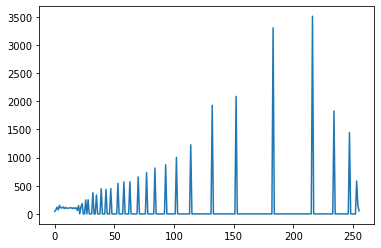

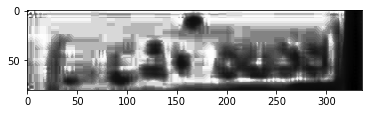

In [240]:
historiginal= cv2.calcHist([resized],[0],None,[256],[0,256])
plt.plot(historiginal)
equalized = cv2.equalizeHist(resized)

cv2_imshow(equalized )
plt.show()
histequalized= cv2.calcHist([equalized],[0],None,[256],[0,256])
plt.plot(histequalized)
plt.show()

plt.imshow(equalized, cmap = 'gray')

Log transformation

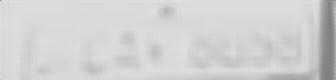

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


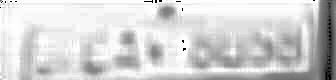

In [241]:
cv2_imshow(resized)
img_log = (np.log(equalized+1)/(np.log(1+np.max(equalized))))*255
# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
cv2_imshow(img_log )

Power transformation

In [242]:
def pow_transform(img, gamma =1.0):
 lookUpTable = np.empty((1,256), np.uint8)
 lst = np.arange (0,256,1)
 for i in lst:
  #build a lookup table mapping the pixel values [0, 255] to their gamma values
  #np.clip is used to clip the values outside the range [0,255] to the interval edges
  lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
  #apply the power-law transformation to the image
 return cv2.LUT(img , lookUpTable)

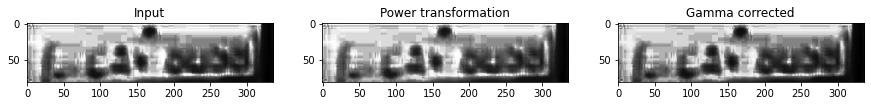

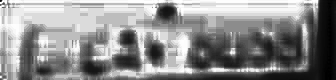

In [243]:
fig = plt.figure(figsize = (15,15))
power = 0.9
#display original image
fig.add_subplot(1,3,1)
plt.imshow(equalized, cmap = 'gray')
plt.title('Input')
#image after power transformation
fig.add_subplot(1,3,2)
plt.imshow(pow_transform(equalized,power), cmap = 'gray')
plt.title('Power transformation')
#gamma corrected
corrected = pow_transform(equalized,1/15)
fig.add_subplot(1,3,3)
plt.imshow(cv2.cvtColor(pow_transform(corrected,15),cv2.COLOR_BGR2RGB))
plt.title('Gamma corrected')
plt.savefig("Gamma corrected.png")
#show the plot
plt.show()
pow_trans= pow_transform(equalized,power)
cv2_imshow(pow_trans)

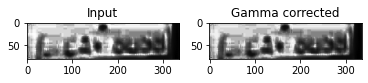

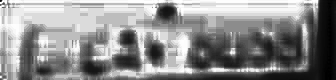

In [244]:
fig = plt.figure()
power = 0.9
#display original image
fig.add_subplot(1,2,1)
plt.imshow(equalized, cmap = 'gray')
plt.title('Input')
#gamma corrected
corrected = pow_transform(equalized,1/15)
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(pow_transform(corrected,15),cv2.COLOR_BGR2RGB))
plt.title('Gamma corrected')
plt.savefig("Gamma corrected.png")
#show the plot
plt.show()
pow_trans= pow_transform(equalized,power)
cv2_imshow(pow_trans)

Contrast stretching


In [245]:
def pixelVal(pix, r1, s1, r2, s2):
 if (0 <= pix and pix <= r1):
  return (s1 / r1)*pix
 elif (r1 < pix and pix <= r2):
  return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
 else:
  return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
 
# function to vectorize the pixelVal() function so that it can be applied to the whole image
def contrast_stretch(img, r1, s1, r2, s2):
 vactorized_func= np.vectorize(pixelVal)
 
 #contrast stretch the whole image
 contrast_stretched = vactorized_func(img, r1, s1, r2, s2)
 
 return contrast_stretched

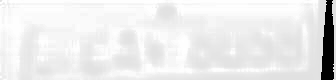

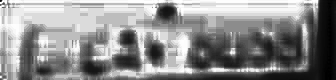

[236 219 219 189 189 219 219 236 189 189 189 219 219 236 236 236 236 236
 236 236 236 236 236 236 247 247 247 247 247 247 247 247 247 247 247 247
 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247
 247 247 247 247 247 247 247 247 247 247 219 219 219 219 219 219 219 219
 219 219 219 219 219 219 219 219 236 236 236 236 236 236 236 236 219 219
 219 219 219 219 219 219 219 219 219 219 219 219 219 219 236 236 236 236
 236 236 236 236 236 236 236 236 236 236 236 236 236 236 236 236 236 236
 236 236 236 236 236 236 236 236 236 236 219 219 219 219 219 219 219 219
 236 236 236 236 247 247 247 253 254 254 254 247 189 111  72  62  32  29
  25  22  21  19  18  18  21  22  23  25  28  34  55  72 111 219 253 236
 219 253 255 253 247 247 247 247 247 247 247 247 247 247 247 247 247 247
 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247
 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247 247
 247 247 247 247 247 247 247 247 247 247 247 247 24

In [246]:
t=10
r1 = t
s1 = 0
r2 = t
s2 = 225
#contrast stretch the image
stretched = contrast_stretch(pow_trans, r1, s1, r2, s2)
cv2_imshow(stretched )
cv2_imshow(pow_trans)
print(pow_trans[10])

Gray level slicing

In [247]:
def slice_pix ( pix, start, end, max, type =0):
 if (pix>= start and pix<=end): 
  return max
 elif(type==0): 
  return 0
 #if type =1 , and intensity is not in the desired range, keep the intensity as it is
 else:
  return pix
 
#function to evaluate the gray level sliced image
def gray_slice(img,start,end,max,type =0):
 vactorized_func= np.vectorize(slice_pix)
 
 #contrast stretch the whole image
 sliced = vactorized_func(img,start,end,max,type =0)
 return sliced

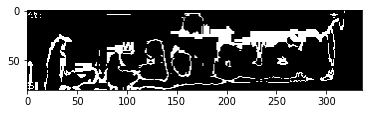

In [248]:
start = 100
end = 150
max = 255
#gray level slice the image
sliced = gray_slice(equalized, start,end,max,0)
plt.imshow(sliced)


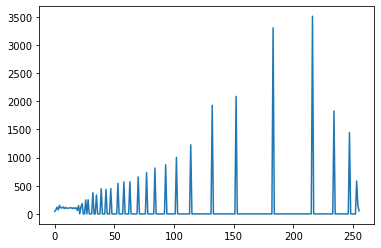

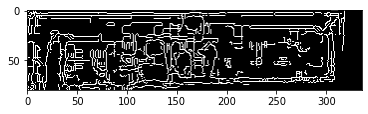

(80, 336)
[234 216 216 183 183 216 216 234 183 183 183 216 216 234 234 234 234 234
 234 234 234 234 234 234 216 216 216 216 216 216 216 216 216 216 216 216
 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216
 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216
 216 216 216 216 216 216 216 216 183 183 183 183 183 183 183 183 216 216
 216 216 216 216 216 216 216 216 216 216 216 216 216 216 183 183 183 183
 183 183 183 183 183 183 183 183 183 183 183 183 183 183 183 183 183 183
 183 183 183 183 183 183 183 183 183 183 216 216 216 216 216 216 216 216
 183 183 183 216 216 234 234 234 152 183 183 152 114  84  58  47  32  32
  32  23  20  19  19  20  20  23  32  35  39  53  70  93  70 132 183 132
 132 216 234 216 183 183 183 183 183 183 183 183 183 183 183 183 183 183
 183 183 183 183 183 183 183 183 183 183 216 216 216 216 216 216 216 216
 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216 216
 216 216 216 216 216 216 216 216 216 216 

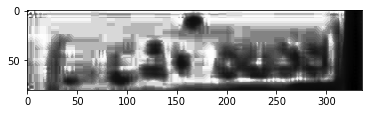

In [249]:
image = equalized

hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
edged = cv2.Canny(image,100,160)
plt.imshow(edged)
plt.show()
plt.imshow(image)
print(image.shape)
print(equalized[15])

Bitplane slicing

In [250]:
def bit_plane(img,plane):
 #in each pixel's intensity,get the value of the bit in position given by plane variable 
 return np.array((img>>plane & 1))

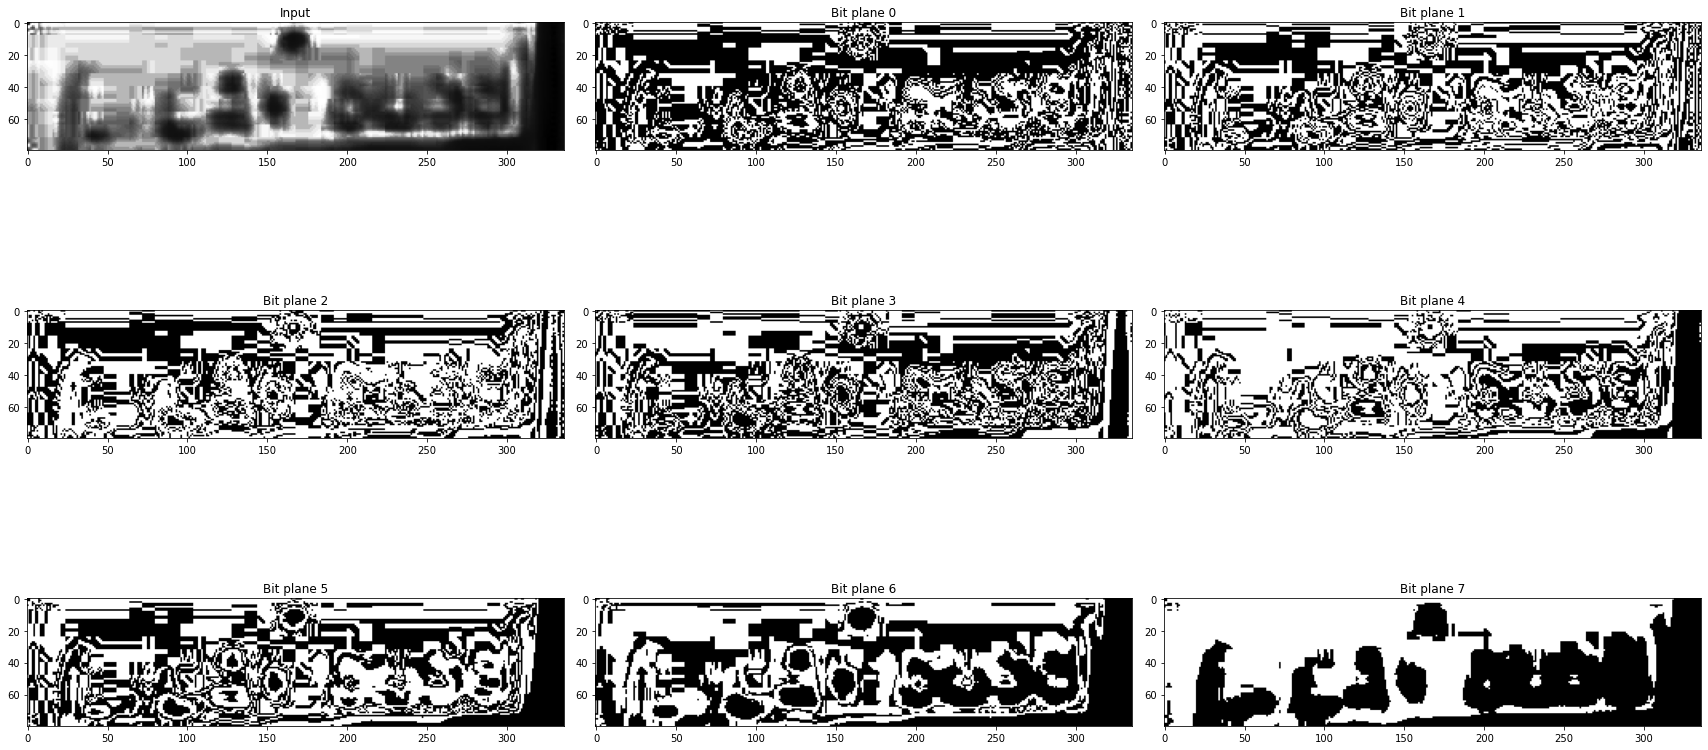

In [251]:
task3_e = equalized
rows_cols = (3,9)
fig = plt.figure(figsize = (30,15))
#display original image
original = plt.subplot2grid(shape=rows_cols, loc=(0, 0), colspan=3, rowspan = 1)
original.imshow(task3_e, cmap='gray', vmin=0, vmax=255)
original.set_title('Input')
#image in bit plane 0
plane= bit_plane(task3_e,0)
plane0 = plt.subplot2grid(shape=rows_cols, loc=(0, 3), colspan=3, rowspan = 1)
plane0.imshow(plane,cmap ='gray')
plane0.set_title('Bit plane 0')
#image in bit plane 1
plane= bit_plane(task3_e,1)
plane1 = plt.subplot2grid(shape=rows_cols, loc=(0, 6), colspan=3, rowspan = 1)
plane1.imshow(plane,cmap ='gray')
plane1.set_title('Bit plane 1')
#image in bit plane 2
plane= bit_plane(task3_e,2)
plane2 = plt.subplot2grid(shape=rows_cols, loc=(1, 0), colspan=3, rowspan = 1)
plane2.imshow(plane,cmap ='gray')
plane2.set_title('Bit plane 2')
#image in bit plane 3
plane= bit_plane(task3_e,3)
plane3 = plt.subplot2grid(shape=rows_cols, loc=(1, 3), colspan=3, rowspan = 1)
plane3.imshow(plane,cmap ='gray')
plane3.set_title('Bit plane 3')
#image in bit plane 4
plane= bit_plane(task3_e,4)
plane4 = plt.subplot2grid(shape=rows_cols, loc=(1, 6), colspan=3, rowspan = 1)
plane4.imshow(plane,cmap ='gray')
plane4.set_title('Bit plane 4')
#image in bit plane 5
plane= bit_plane(task3_e,5)
plane5 = plt.subplot2grid(shape=rows_cols, loc=(2, 0), colspan=3, rowspan = 1)
plane5.imshow(plane,cmap ='gray')
plane5.set_title('Bit plane 5')
#image in bit plane 6
plane= bit_plane(task3_e,6)
plane6 = plt.subplot2grid(shape=rows_cols, loc=(2, 3), colspan=3, rowspan = 1)
plane6.imshow(plane,cmap ='gray')
plane6.set_title('Bit plane 6')
#image in bit plane 7
plane= bit_plane(task3_e,7)
plane7 = plt.subplot2grid(shape=rows_cols, loc=(2, 6), colspan=3, rowspan = 1)
plane7.imshow(plane,cmap ='gray')
plane7.set_title('Bit plane 7')
#show the plot
plt.show()

In [252]:
import glob

In [253]:
#images = [cv2.imread(file,0) for file in glob.glob(folder+"/*.PNG")]

In [254]:
#print(type(images))

In [255]:
#scale_percent = 120 # percent of original size
#width = int(img1.shape[1] * scale_percent / 100)
#height = int(img1.shape[0] * scale_percent / 100)
#dim = (width, height)

#for i in images:
  
 # resized = cv2.resize(i, dim, interpolation = cv2.INTER_AREA) 
  #print("resized")
  #cv2_imshow(resized)
  #equalized = cv2.equalizeHist(resized)
  #print("equalized")
  #cv2_imshow(equalized )

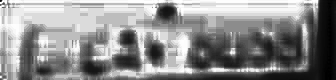

In [256]:
img= pow_trans
cv2_imshow(pow_trans)

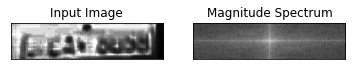

In [257]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

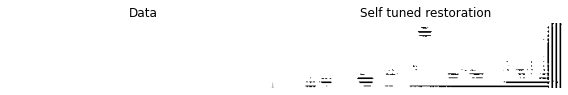

In [258]:
from skimage import color, data, restoration

rng = np.random.default_rng()

astro = equalized
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
#astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

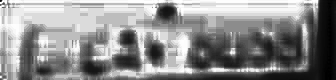

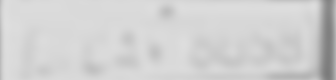

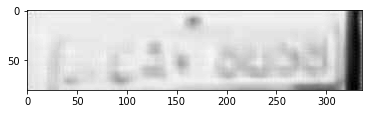

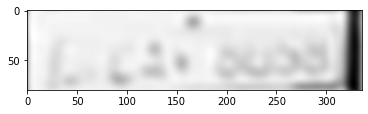

In [259]:
from skimage import color, data, restoration
cv2_imshow(pow_trans)
img =  cv2.imread(folder+"/D1_super.jpg",0)
from scipy.signal import convolve2d
psf = np.ones((5, 5)) / 25
# img = convolve2d(img, psf, 'same')
# # cv2_imshow(img)
# img += 0.1 * img.std() * np.random.standard_normal(img.shape)
deconvolved_img = restoration.wiener(img, psf,33, clip=False)
cv2_imshow(deconvolved_img)
plt.imshow(img)

plt.show()
plt.imshow(deconvolved_img)

#Image restoration : LOOKS LIKE IMAGES HAVE ADDITIONAL NOISE

https://github.com/maponti/imageprocessing_course_icmc/blob/master/05b_restoration_deconvolution.ipynb

In [260]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.fftpack import fftn, ifftn, fftshift

Gaussian distribution

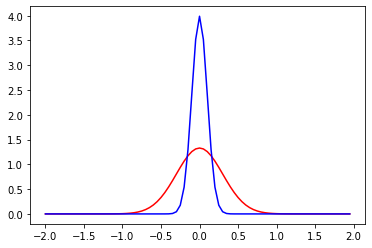

In [261]:
x = np.arange(-2,2,0.05)

# parameter sigma is related to the dispersion of the values
sigma1 = 0.3
gauss1d_1 = (1/(sigma1*np.sqrt(2*np.pi))) * np.exp(-(np.square(x/sigma1)/2))

sigma2 = 0.1
gauss1d_2 = (1/(sigma2*np.sqrt(2*np.pi))) * np.exp(-(np.square(x/sigma2)/2))

plt.plot(x, gauss1d_1, 'r') # larger sigma, 0.3
plt.plot(x, gauss1d_2, 'b') # smaller sigma, 0.1

Create a gaussian filter

In [262]:
def gaussian_filter(k=5, sigma=1.0):
    ''' Gaussian filter
    :param k: defines the lateral size of the kernel/filter, default 5
    :param sigma: standard deviation (dispersion) of the Gaussian distribution
    :return matrix with a filter [k x k] to be used in convolution operations
    '''
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y)) / np.square(sigma))
    return filt / np.sum(filt)

In [263]:
g1 = gaussian_filter(k=5, sigma=0.9)
print(g1)

[[0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.01675038 0.10672687 0.19785944 0.10672687 0.01675038]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]]


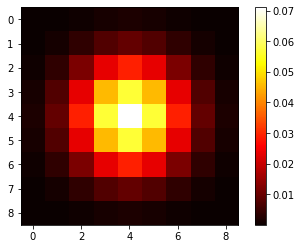

In [264]:
g2 = gaussian_filter(k=9, sigma=1.5)
plt.imshow(g2, cmap='hot', interpolation='nearest')
plt.colorbar()

Simulating Blur


(34, 112)
(34, 112)
(34, 112)
(34, 112)


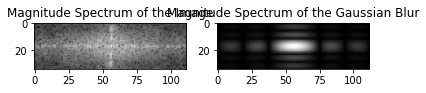

(34, 112)


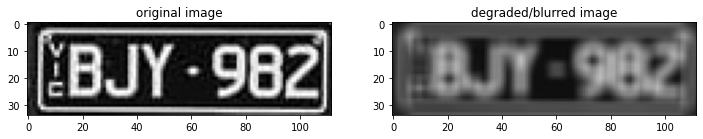

In [265]:
f = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/images/correct.jpg",0)

print(f.shape)

# scale_percent = 120 # percent of original size
# width = int(img1.shape[1] * scale_percent / 100)
# height = int(img1.shape[0] * scale_percent / 100)
# dim = (100, 100)
# f = cv2.resize(f, dim, interpolation = cv2.INTER_AREA) 
print(f.shape)
h = gaussian_filter(k=6, sigma=20)

# computing the number of padding on one side
a = int(f.shape[0]//2 - h.shape[0]//2)
b = int(f.shape[1]//2 - h.shape[1]//2)

h_pad = np.pad(h, ((a,a),(b,b)), 'constant', constant_values=(0))

# computing the Fourier transforms
F = fftn(f)
print(F.shape)
H = fftn(h_pad)
print(H.shape)
plt.subplot(121)
plt.imshow(fftshift(np.log(np.abs(F)+1)), cmap="gray")
plt.title("Magnitude Spectrum of the Image")
plt.subplot(122)
plt.imshow(fftshift(np.log(np.abs(H)+1)), cmap="gray")
plt.title("Magnitude Spectrum of the Gaussian Blur")
plt.show()
# convolution
G = np.multiply(F,H)
print(G.shape)

# Inverse Transform
# - we have to perform FFT shift before reconstructing the image in the space domain
g = fftshift(ifftn(G).real)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(f, cmap="gray", vmin=0, vmax=255); plt.title("original image")
plt.subplot(122)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")
plt.show()

Text(0.5, 1.0, 'restored image')

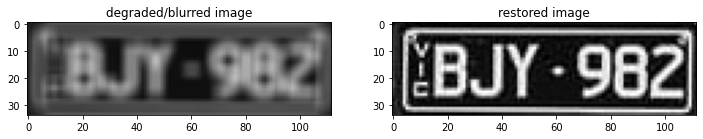

In [266]:
#F_hat = G/H
F_hat = np.divide(G,H)

f_hat = ifftn(F_hat).real

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")
plt.subplot(122)
plt.imshow(f_hat, cmap="gray", vmin=0, vmax=255); plt.title("restored image")

In [267]:
img1 = cv2.imread(folder+"/D1_super.jpg",0) #This is the blurred image. therefore it should be G
G = np.fft.fft2(img1)
g = ifftn(G).real
# G =fftn(img1)
# g = fftshift(ifftn(G).real)

print(G.shape)
h = gaussian_filter(k=5, sigma=2)
a = int(G.shape[0]//2 - h.shape[0]//2)
b = int(G.shape[1]//2 - h.shape[1]//2)


h_pad = np.pad(h, ((a-1,a),(b,b-1)), 'constant', constant_values=(0))
H = fftn(h_pad)
print(H.shape)

(80, 336)
(80, 336)


Text(0.5, 1.0, 'restored image')

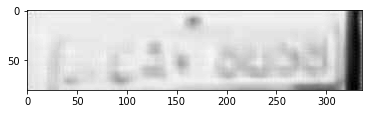

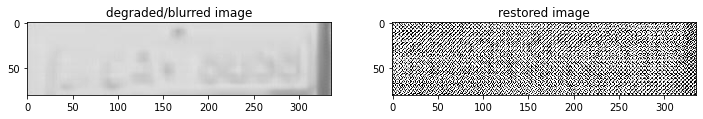

In [268]:
F_hat = np.divide(G,H)

f_hat = fftshift(ifftn(F_hat).real)
plt.imshow(img1,cmap ='gray')

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")
plt.subplot(122)
plt.imshow(f_hat, cmap="gray", vmin=0, vmax=255); plt.title("restored image")

Wiener Filter

In [269]:
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d

In [270]:
def wiener_filter(img, kernel, K):
	kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = fft2(dummy)
	kernel = fft2(kernel, s = img.shape)
	kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
	dummy = dummy * kernel
	dummy = np.abs(ifft2(dummy))
	return dummy

In [271]:

def gaussian_kernel(k=5, sigma=1.0):
    ''' Gaussian filter
    :param k: defines the lateral size of the kernel/filter, default 5
    :param sigma: standard deviation (dispersion) of the Gaussian distribution
    :return matrix with a filter [k x k] to be used in convolution operations
    '''
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y)) / np.square(sigma))
    return filt / np.sum(filt)

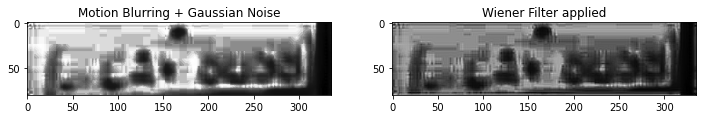

[[164.78595891 232.3157102  280.24788487 ...   4.47157606  17.89052571
    9.36507603]
 [354.49142806 217.37850637 136.05466855 ...  48.10689259  75.60632891
  179.36428842]
 [304.29218171  69.43493452  48.30701797 ...  56.20852692  89.62620827
  206.66547484]
 ...
 [186.45355579  88.09529738 102.85594789 ...  44.78902633  51.36697684
  128.99496108]
 [ 50.54069775  94.42809363 181.40990927 ...   1.20647899  32.85836199
   11.49648918]
 [  8.97243719 147.64508116 271.02226771 ...  25.11885381   1.22391138
   81.93488711]]
[[ 13  22 189 ...  11  12  12]
 [ 25  93 255 ...  13  15  15]
 [254 255 253 ...  13  16  16]
 ...
 [253 219 123 ...  10  12  13]
 [123 123 123 ...  10  12  13]
 [ 72  86 123 ...  11  13  15]]


In [272]:
kernel = gaussian_kernel(3,2)
noisy_img = pow_trans
filtered_img = wiener_filter(noisy_img, kernel, K =0.1)

# Display results
display = [ noisy_img, filtered_img]
label = [ 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
  fig.add_subplot(2, 2, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
print(filtered_img)
print(noisy_img)

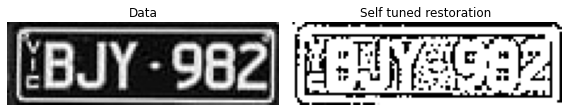

In [273]:
from skimage import color, data, restoration

rng = np.random.default_rng()

astro = cv2.imread("/content/drive/MyDrive/CO543_Mini_Project/images/correct.jpg",0)
from scipy.signal import convolve2d as conv2
psf = gaussian_filter(k=3, sigma=1)
#astro = conv2(astro, psf, 'same')
#astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

In [274]:
#for i in images:
 # print("original")
 # cv2_imshow(i)
 # equalized = cv2.equalizeHist(i)
 # print("equalized")
 # cv2_imshow(equalized )
 # pow_filt= pow_transform(equalized,power)
 # print("powered")
 # cv2_imshow(pow_filt)
 # filtered_img = wiener_filter( pow_filt, kernel, K =0.1)
 # cv2_imshow(filtered_img )

In [275]:
def threshold(img,val):
 img[img>val] = 255
 img[img!=255] =0
 return img


In [276]:
def plotgraphs(original,spectrum,filteredimg,plottitle, title1 ='Input' ,title2 = 'Magnitude spectrum',title3= 'Output'):
      
    #plot the images    
    fig = plt.figure(figsize = (25,10))

    fig.suptitle(plottitle,fontsize = 20)
    plot_size = (2,11)
   

    #display original image
    first = plt.subplot2grid(shape=plot_size, loc=(0, 0), colspan=3, rowspan = 1)
    first.imshow(original, cmap='gray')
    first.set_title(title1)
    plt.axis('off')


    #display magnitude spectrum of the filter
    second = plt.subplot2grid(shape=plot_size, loc=(0, 4), colspan=3, rowspan = 1)
    second.imshow(spectrum, cmap='gray')
    second.set_title(title2)
    plt.axis('off')
  
    #display filtered image
    third = plt.subplot2grid(shape=plot_size, loc=(0, 8), colspan=3, rowspan = 1)
    third.imshow(filteredimg, cmap='gray')
    third.set_title(title3)
    plt.axis('off')
    
   # plt.savefig(plottitle+".png")
    plt.show()
   

In [277]:
def apply_filter(img,kernel,title):
    #Apply Padding to the kernel to reshape the filter kernel to the shape of the image
    scale_percent = 200 # percent of original size
    width = int(img1.shape[1] * scale_percent / 100)
    height = int(img1.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)
    equalized = cv2.equalizeHist(resized)
    cv2_imshow(equalized)
    H = np.zeros(equalized.shape)
    offset = 3
    H[offset:kernel.shape[0]+offset,offset:kernel.shape[1]+offset] = kernel

    #Compute the DFT of the filter kernel, adjust the shift and obtain the magnitude spectrum
    FH = np.fft.fft2(H)
    fshift= np.fft.fftshift(FH)
    mag_spectrum = np.log(np.abs(fshift)+1)
    
    # Get the FFT of image
    FI = np.fft.fft2(equalized) 

    #Apply the filter to the image using Multiplication in Fourier Domain
    FJ = FI*FH 
    # Get the inverse Fourier Transform
    J = np.fft.ifft2(FJ) 
  #   f = np.fft.fft2(i) ## get the fourier transform of the grayscale image
  # fshift = np.fft.fftshift(f) ## Shift the zero-frequency component to the center of the spectrum.
  # magnitude_spectrum = 20*np.log(np.abs(fshift)) #get the magnitude spectrum of the image
 
    mag_spectrum_filt = 20*np.log(np.abs( np.fft.fftshift(FJ))+1) 
    cv2_imshow(mag_spectrum_filt)
    #Display the original image, magnitude spectrum of the filter and the filtered image
    plotgraphs( equalized,mag_spectrum,J.real,title)
    
   # cv2_imshow( threshold(J.real,-20))
    #return the filtered image
    return J

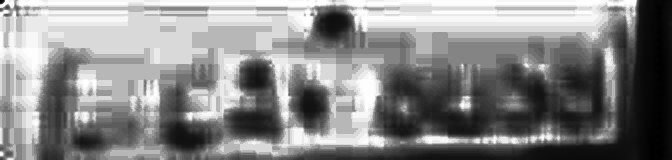

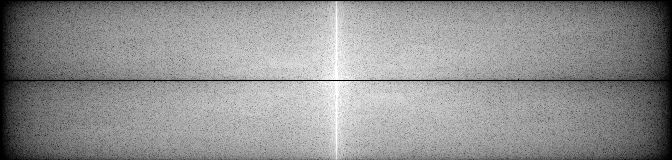

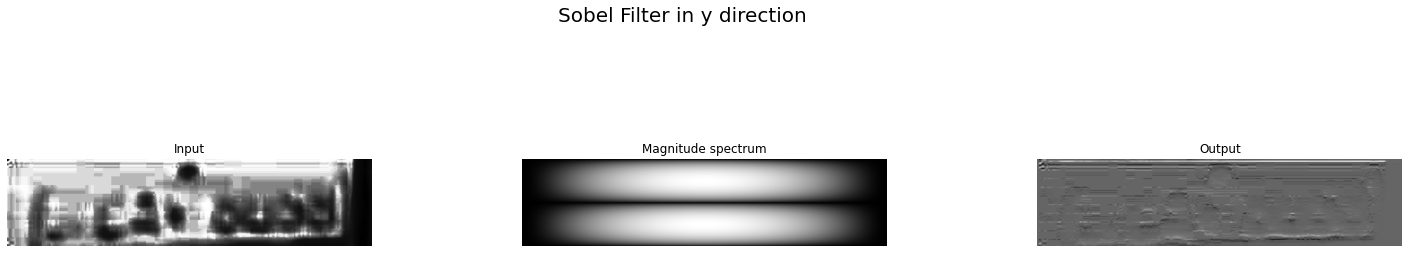

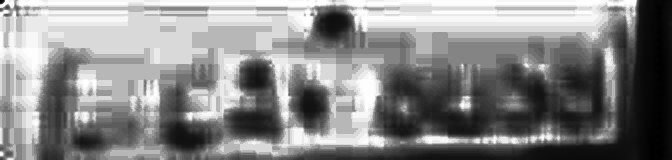

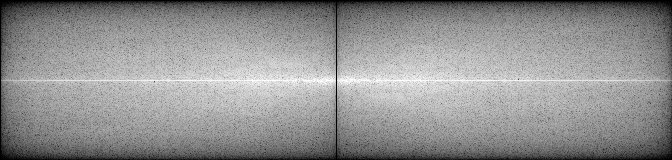

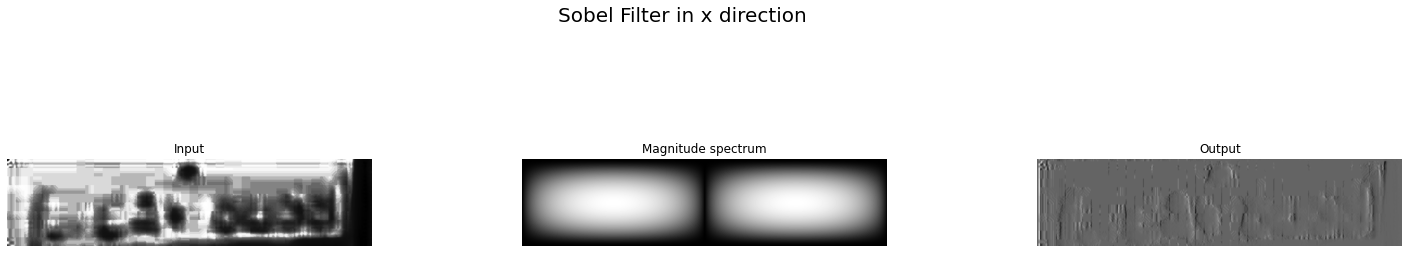

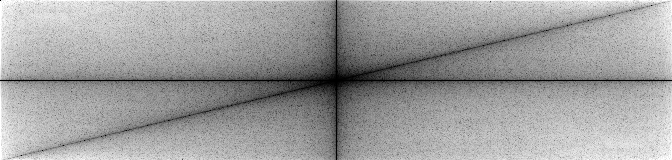

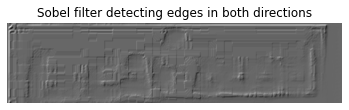

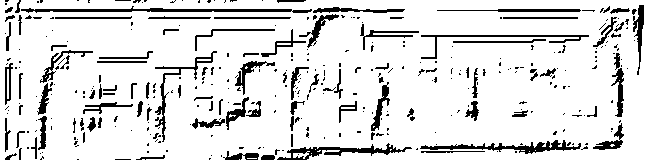

In [278]:
def sobel(img):
    #sobel filter in y direction
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    #sobel filter in x direction
    sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    # sobel_y = np.array([[1, 0], [0, -1]])
    # sobel_x = np.array([[0, 1], [-1, 0]])
    yfiltered= apply_filter(img,sobel_y,"Sobel Filter in y direction")
    xfiltered= apply_filter(img,sobel_x,"Sobel Filter in x direction")
    #both = apply_filter(img,-(sobel_x+sobel_y),"Sobel Filter in diagonal direction")
    complete =  yfiltered.real + xfiltered.real #+ both.real
    fcomplete = np.fft.fft2(complete) 
    mag_spectrum_filt = 20*np.log(np.abs( fcomplete)+1) 
    # phase = np.angle(fcomplete)
    cv2_imshow( mag_spectrum_filt)
    # cv2_imshow(phase)
    plt.imshow(complete, cmap='gray')
    plt.title("Sobel filter detecting edges in both directions")
    plt.axis('off')
    plt.savefig("Sobel filter detecting edges in both directions"+".png")
    plt.show()
    # print(complete.real[30])
   
    cv2_imshow( threshold(complete.real,-100))
    #cv2_imshow(image_result)
img1 = cv2.imread(folder+"/D1_super.jpg",0)
sobel(img1)

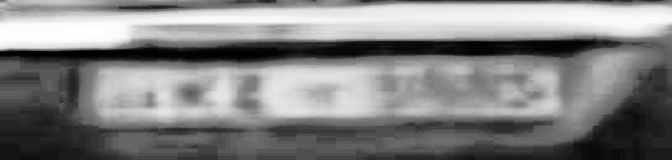

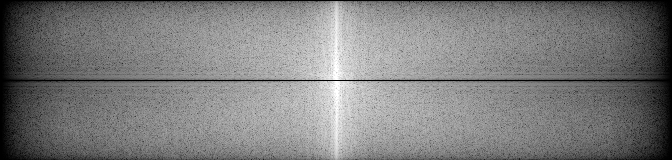

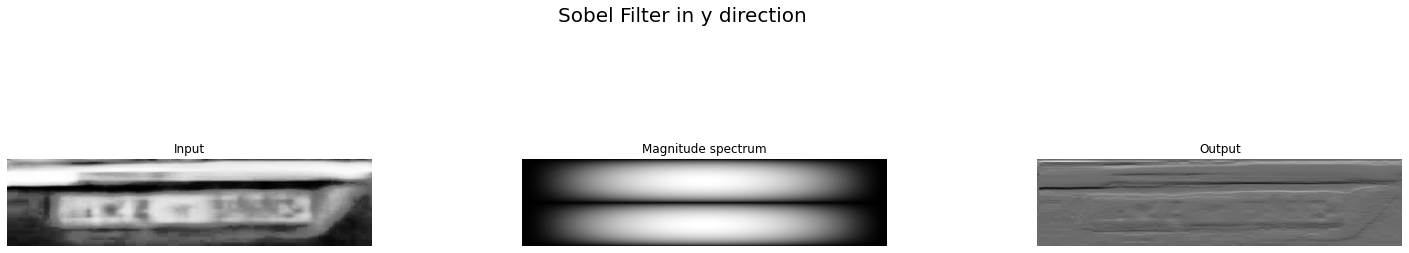

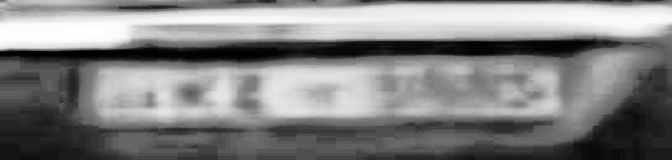

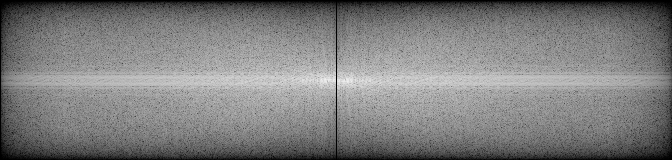

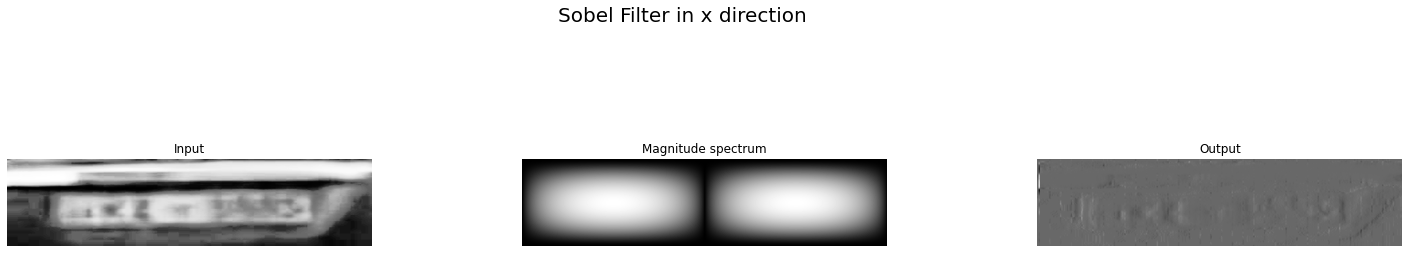

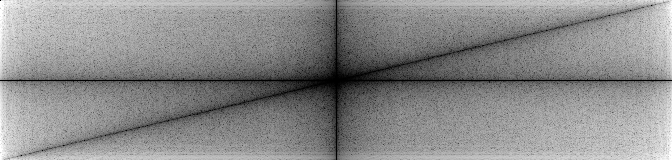

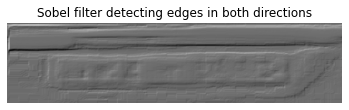

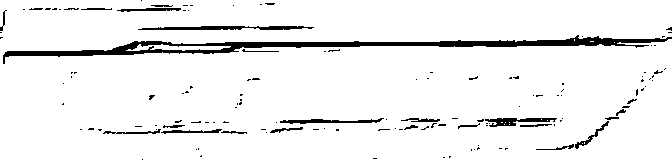

In [279]:
# equalized = cv2.equalizeHist(img1)
# sobel(equalized )
img2 = cv2.imread(folder+"/D3_super.jpg",0)
sobel(img2)

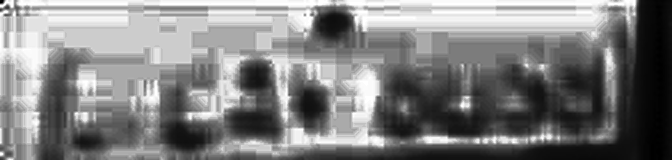

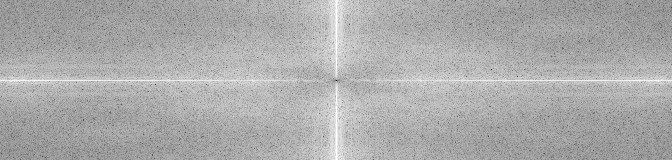

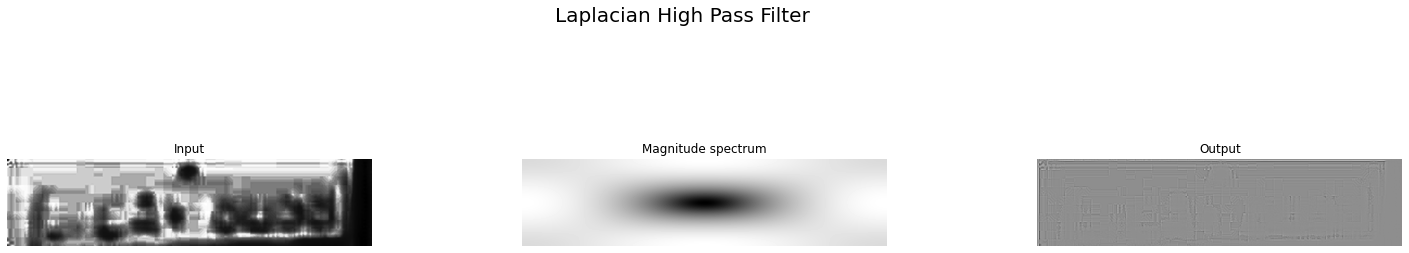

In [280]:
def laplace(img):
    
    laplacian = np.array([[1, 1, 1],
                        [1,-8, 1],
                        [1, 1, 1]])
    
    apply_filter(img,laplacian,"Laplacian High Pass Filter")

    return

laplace(equalized)

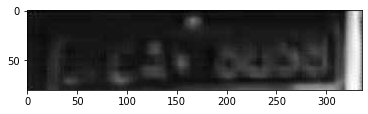

In [281]:
ghpf = 1-cv2.GaussianBlur(img1,(5,5),0.00000001)
plt.imshow(ghpf, cmap='gray')

Obtained threshold:  75.0


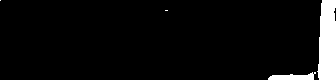

In [282]:
otsu_threshold, image_result = cv2.threshold(
    ghpf, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)
print("Obtained threshold: ", otsu_threshold)
cv2_imshow(image_result)

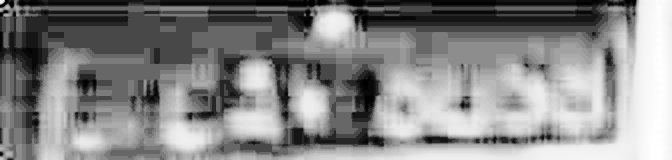

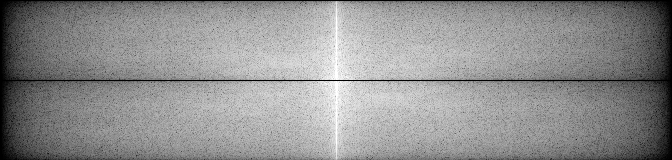

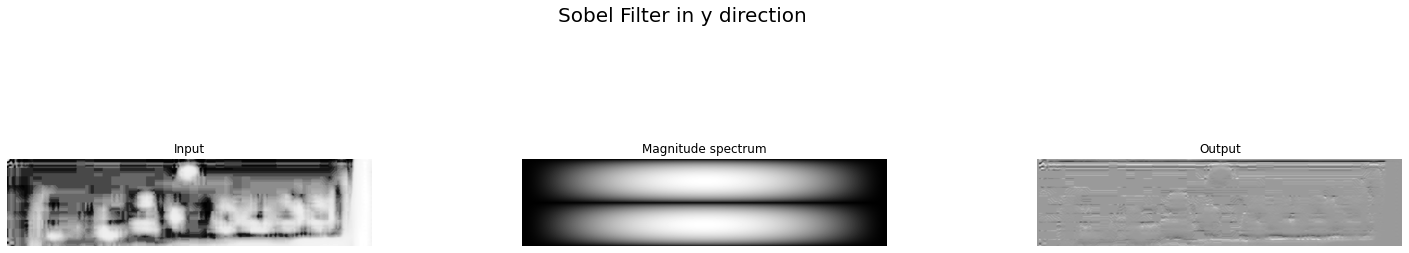

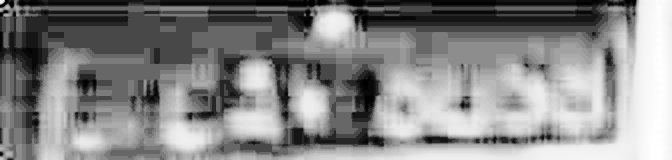

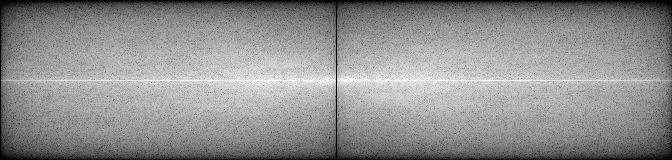

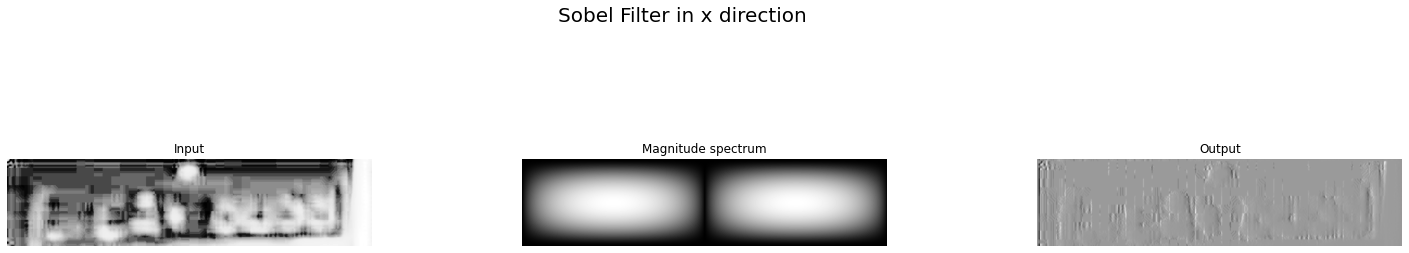

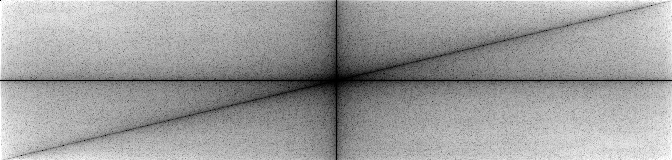

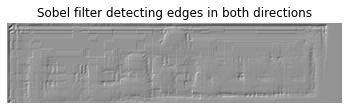

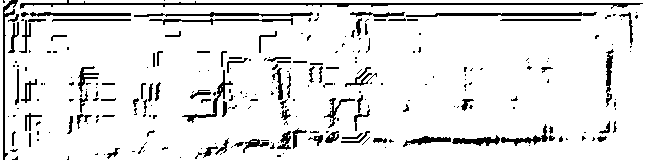

In [283]:
sobel(ghpf)

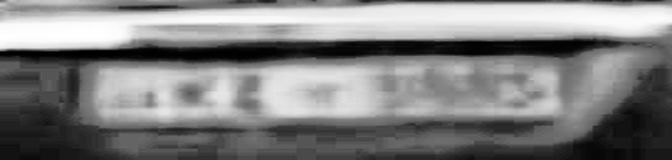

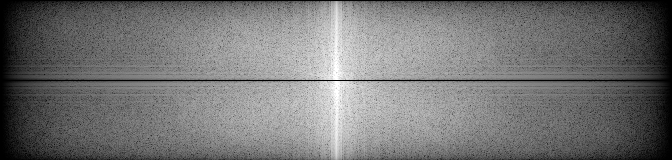

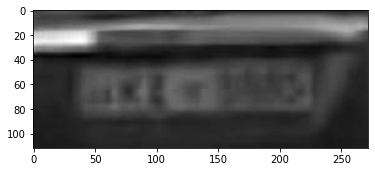

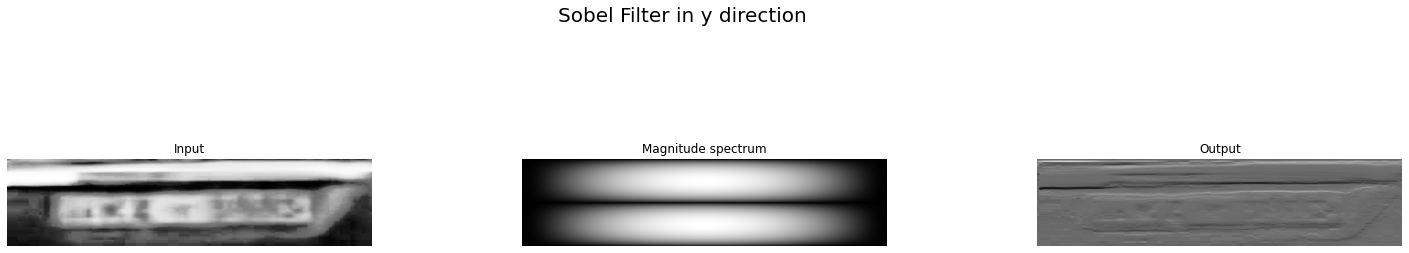

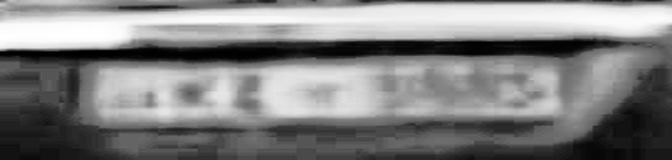

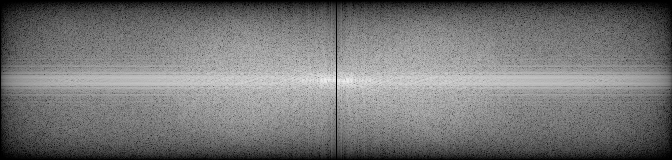

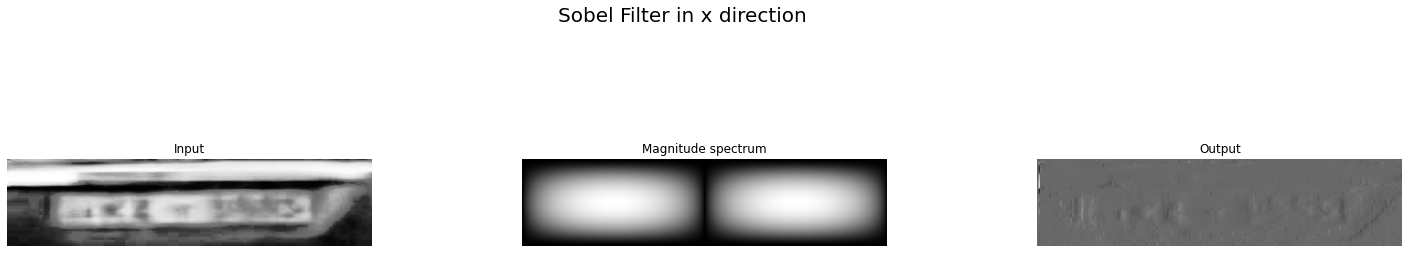

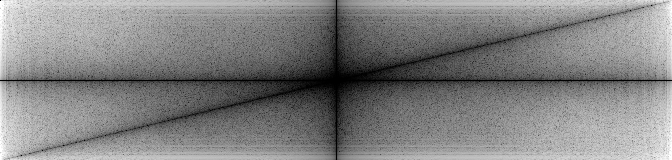

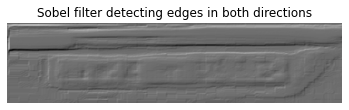

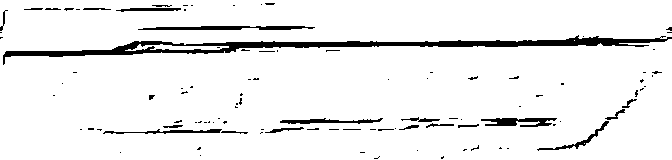

In [284]:
img2 = cv2.imread(folder+"/D3_super.jpg",0)
ghpf2 = cv2.GaussianBlur(img2,(5,5),0.00000001)
plt.imshow(ghpf2, cmap='gray')

equalized = cv2.equalizeHist(img2)
sobel(equalized )

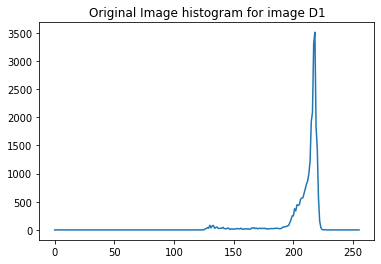

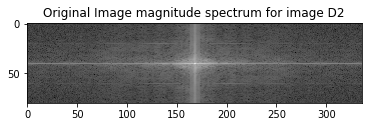

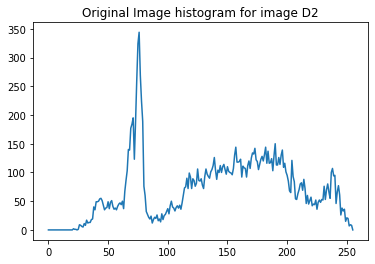

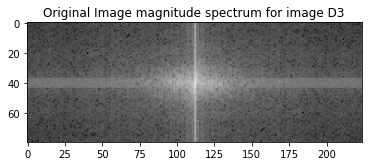

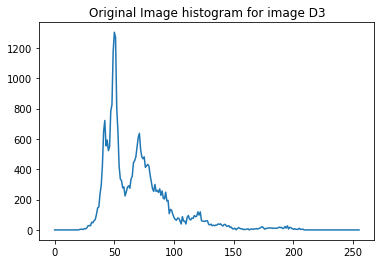

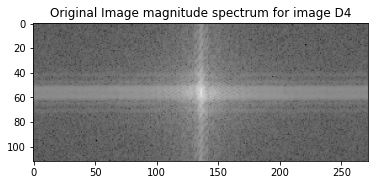

In [285]:
img1 = cv2.imread(folder+"/D1_super.jpg",0)
img2 = cv2.imread(folder+"/D2_super.jpg",0)
img3 = cv2.imread(folder+"/D3_super.jpg",0)
images = [img1,img2,img3]
j=1

for i in images:

  historiginal= cv2.calcHist([i],[0],None,[256],[0,256])
  plt.plot(historiginal)
  plt.title("Original Image histogram for image D"+str(j))
  plt.savefig("Original Image histogram for image D"+str(j)+".png")
  plt.show()
  j = j+1

  f = np.fft.fft2(i) ## get the fourier transform of the grayscale image
  fshift = np.fft.fftshift(f) ## Shift the zero-frequency component to the center of the spectrum.
  magnitude_spectrum = 20*np.log(np.abs(fshift)) #get the magnitude spectrum of the image
  #ifft_img = np.fft.ifft2(f) ##get the inverse fourier transform
  plt.imshow(magnitude_spectrum, cmap='gray')
  plt.title("Original Image magnitude spectrum for image D"+str(j))
  plt.savefig("Original Image magnitude spectrum for image D"+str(j)+".png")
  plt.show()

  # equalized = cv2.equalizeHist(resized)

  # cv2_imshow(equalized )
  # histequalized= cv2.calcHist([equalized],[0],None,[256],[0,256])
  # plt.plot(histequalized)
  # plt.imshow(equalized, cmap = 'gray')

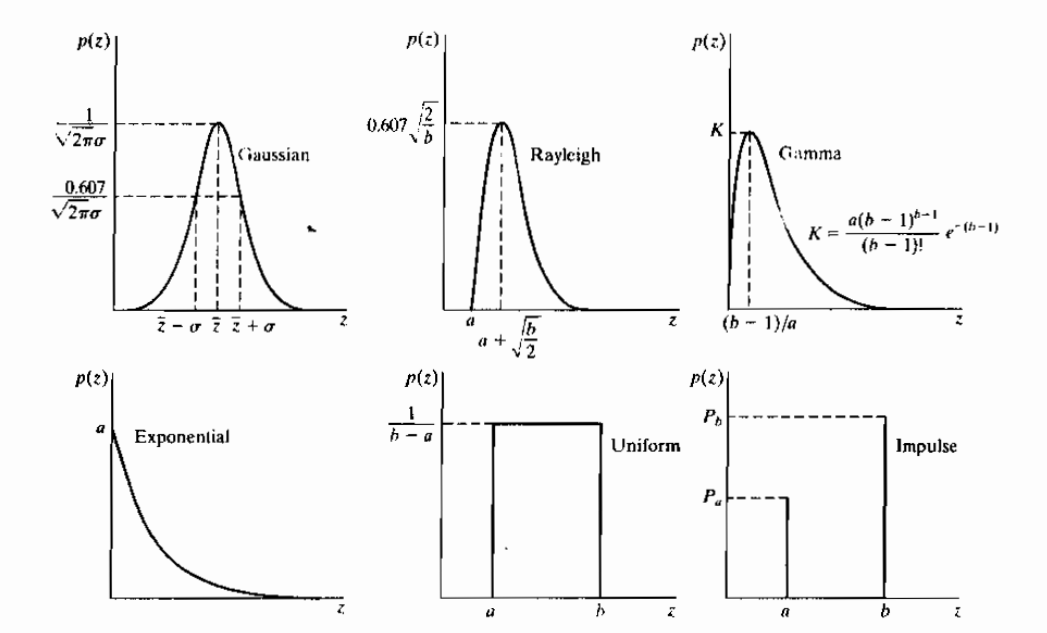

Looks like 
* D1 has exponential/gamma noise (ae<sup>-az</sup> where a<0)
* D2 has Gaussian noise 
     With mean = 75 and standard deviation = 50 (maybe)
* D3 has Rayleigh noise
     With a = 45 (maybe)


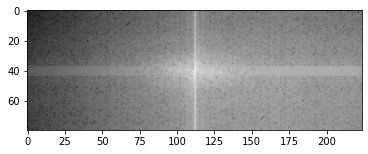

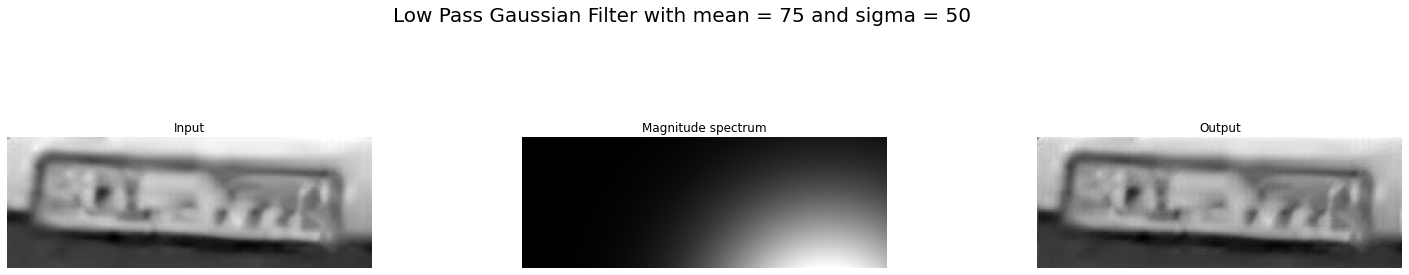

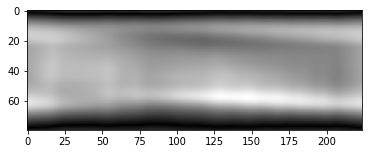

In [286]:
# try to remove gaussian noise from D2
import math
u=75
sigma = 50
rows,cols = img2.shape
gausskernel = []
#for each element in the kernel apply the gaussian formula exp(-((x-u)**2 + (y-u)**2)/(2*pi*sigma**2))/(2*pi*sigma**2)
for i in range (-rows//2, rows//2):
    for j in range (-cols//2,cols//2):
        norm = math.pow(i-u,2) + math.pow(j-u,2)
        gausskernel.append( math.exp(-norm/(2*math.pow(sigma,2)))/2*math.pi*math.pow(sigma,2))
        
gausskernel = np.array(gausskernel)
gausskernel = gausskernel.reshape(rows,cols)

# get the fourier transform of the grayscale image
FI = np.fft.fftshift(np.fft.fft2(img2))
#Apply the filter
FJ = FI*gausskernel
J = np.abs(np.fft.ifft2(FJ) ) # Get the inverse Fourier Transform
magnitude_spectrum = 20*np.log(np.abs(FJ)) 
plt.imshow(magnitude_spectrum,cmap='gray')
plotgraphs(img2,gausskernel,J.real,"Low Pass Gaussian Filter with mean = " + str(u)+ " and sigma = "+ str(sigma))

filtered_img = wiener_filter(img2, gausskernel, K =0.1)
plt.imshow(filtered_img)


In [287]:
from numpy import random

x = random.rayleigh(scale=1, size=(img3.shape[0], img3.shape[1]))
print(x)

[[0.42907247 2.58882574 0.83941046 ... 1.91328174 1.46913061 0.3440894 ]
 [0.21111849 0.96543256 0.23432397 ... 0.43363061 0.7538529  0.87686081]
 [1.19885874 0.36727216 1.60123818 ... 0.84222825 1.67384342 1.01882923]
 ...
 [1.53526629 1.76060437 1.8495826  ... 2.78107243 1.28488083 1.22987604]
 [0.70491647 0.55248412 2.26767673 ... 0.77452514 1.68539291 0.59573709]
 [0.49614841 1.55267394 1.17367039 ... 0.75179367 1.61884989 0.77210639]]


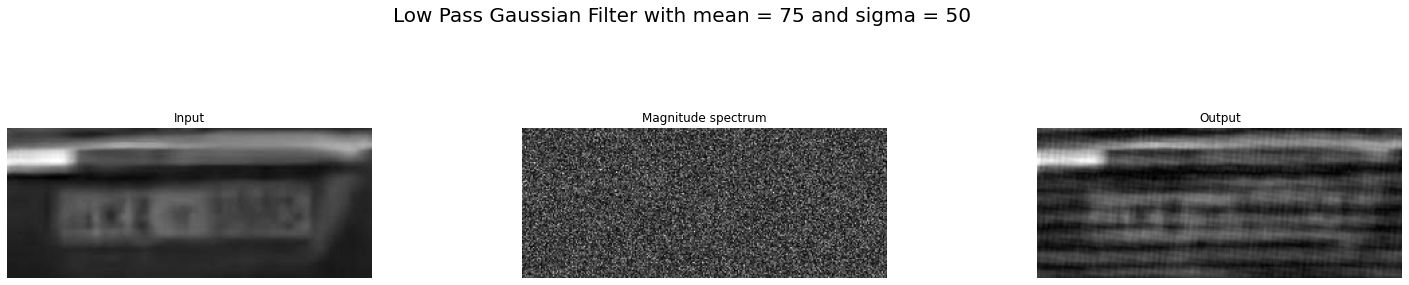

In [288]:
from re import X
FI = np.fft.fftshift(np.fft.fft2(img3))
FJ = np.divide(FI,x)
J = np.abs(np.fft.ifft2(FJ) ) # Get the inverse Fourier Transform

plotgraphs(img3,x,J.real,"Low Pass Gaussian Filter with mean = " + str(u)+ " and sigma = "+ str(sigma))


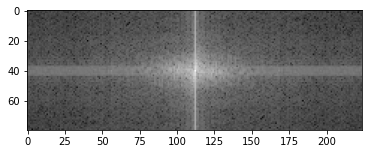

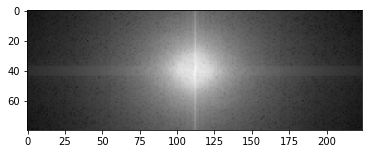

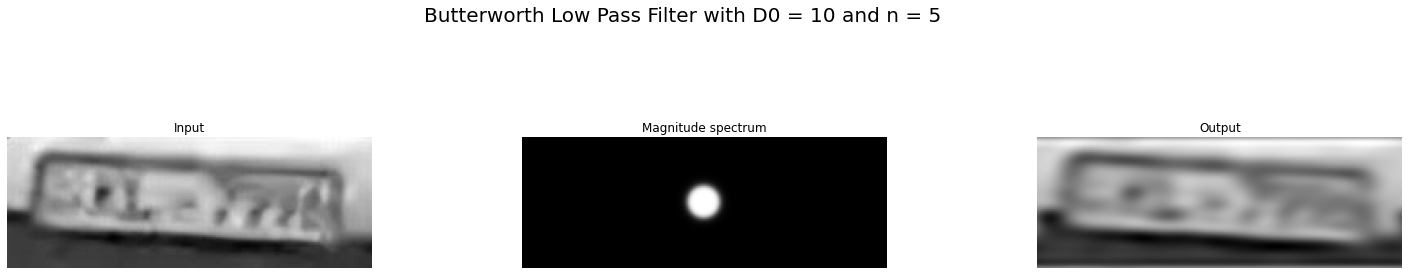

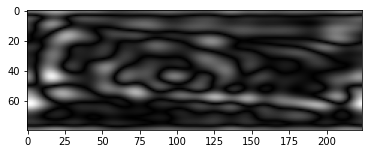

In [289]:
def butterworth_low(img,n,D0):
    rows,cols = img.shape
    H = np.zeros(img.shape)
    for u in range (rows):
        for v in range (cols):
            D = (u- (rows-1)//2)**2 + (v- (cols-1)//2)**2
            H[u,v] = 1/(1+ (D/D0**2)**n)
            
       
    # get the fourier transform of the grayscale image
   
    FI = np.fft.fftshift(np.fft.fft2(img))
   
    mg_ft = 20*np.log(np.abs(FI)) 
    plt.imshow(mg_ft)
    plt.show()
    #Apply the filter
    FJ = FI * H
    J = np.abs(np.fft.ifft2(FJ) ) # Get the inverse Fourier Transform
    magnitude_spectrum = 20*np.log(np.abs(FJ)) 
    plt.imshow(magnitude_spectrum)
    plt.show()
    plotgraphs(img,H,J.real,"Butterworth Low Pass Filter with D0 = " + str(D0)+ " and n = " +str(n))
    return J
img2 = cv2.imread(folder+"/D2_super.jpg",0)
D0 = 10
n= 5
bJ= butterworth_low(img2,n,D0)


filtered_img = wiener_filter(bJ.real, gausskernel, K =0.0001)
plt.imshow(filtered_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


[[0.00000000e+00 4.97175738e-31 2.31082748e-61 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[-2.26854895e-15  2.37189938e-15 -2.47398419e-15 ...  1.95145869e-15
  -2.05827251e-15  2.16398806e-15]
 [ 2.26854895e-15 -2.37189938e-15  2.47398419e-15 ... -1.95145869e-15
   2.05827251e-15 -2.16398806e-15]
 [-2.26854895e-15  2.37189938e-15 -2.47398419e-15 ...  1.95145869e-15
  -2.05827251e-15  2.16398806e-15]
 ...
 [ 2.26854895e-15 -2.37189938e-15  2.47398419e-15 ... -1.95145869e-15
   2.05827

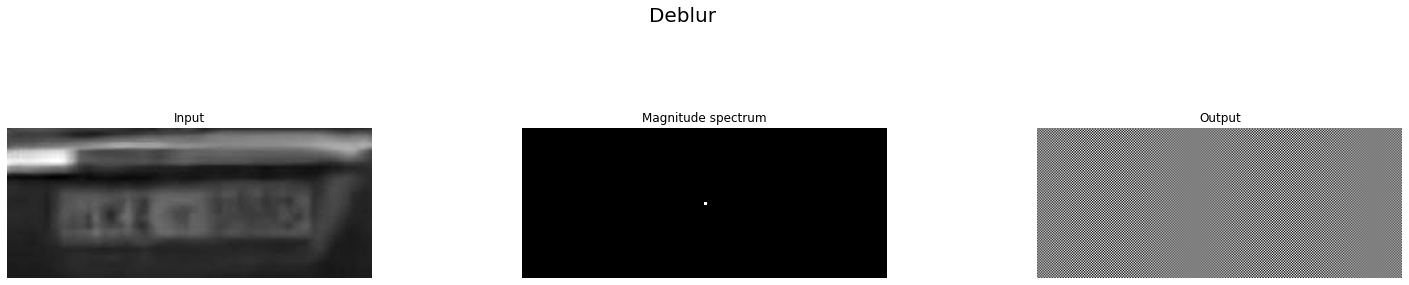

In [290]:
def restore(img, a,b,T,K):
 rows,cols = img.shape
 H = np.zeros(img.shape)
 for u in range (rows):
  for v in range (cols):
    plus = (u*a+v*b)
    e = np.exp(-j*np.pi*plus)
   # print(e)
    s = np.sin(np.pi*plus)
    H[u,v] = T * s*e/(np.pi * plus)
  #  print(H[u,v])
   
 mag2 = np.abs(H)**2
 mag2[np.isnan(mag2)] = 0
 print(mag2)
 degrad = np.divide(mag2,(H*(mag2+K)))
 #get the DFT of image and shift it
 FI = np.fft.fftshift(np.fft.fft2(img))
 #Apply filter
 FJ = degrad * FI
 FJ[np.isnan(FJ)] = 0
 J = np.fft.ifft2(np.fft.fftshift(FJ))  # Get the inverse Fourier Transform
 print(J.real)
 plotgraphs(img,20*np.log(np.abs(np.fft.fftshift(H))+1),J.real,"Deblur")
 return

img2 = cv2.imread(folder+"/D3_super.jpg",0)
a=100

b=0.1
T=1
K=0.00025
restore(img2, a,b,T,K)
